In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score
import pandas as pd

In [9]:
print(tf.test.is_gpu_available(),tf.__version__ )
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
print(gpus, cpus)

True 1.15.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [12]:
normal = pd.read_csv("input/SWaT_Dataset_Normal.csv", header=0)#, nrows=1000)
print(normal.head())
print(normal.columns)

                Timestamp    FIT101    LIT101  MV101  P101  P102    AIT201  \
0   22/12/2015 4:00:00 PM  2.470294  261.5804      2     2     1  244.3284   
1   22/12/2015 4:00:01 PM  2.457163  261.1879      2     2     1  244.3284   
2   22/12/2015 4:00:02 PM  2.439548  260.9131      2     2     1  244.3284   
3   22/12/2015 4:00:03 PM  2.428338  260.2850      2     2     1  244.3284   
4   22/12/2015 4:00:04 PM  2.424815  259.8925      2     2     1  244.4245   

    AIT202   AIT203    FIT201  ...  P501  P502    PIT501  PIT502    PIT503  \
0  8.19008  306.101  2.471278  ...     1     1  10.02948     0.0  4.277749   
1  8.19008  306.101  2.468587  ...     1     1  10.02948     0.0  4.277749   
2  8.19008  306.101  2.467305  ...     1     1  10.02948     0.0  4.277749   
3  8.19008  306.101  2.466536  ...     1     1  10.02948     0.0  4.277749   
4  8.19008  306.101  2.466536  ...     1     1  10.02948     0.0  4.277749   

     FIT601  P601  P602  P603  Normal/Attack  
0  0.000256    

In [13]:
normal = normal.drop(["Timestamp" , "Normal/Attack","P601","P602","P603"] , axis = 1)
normal.shape
print(normal.head())
normal = normal.astype(float)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x = normal.values
x_scaled = min_max_scaler.fit_transform(x)
normal = pd.DataFrame(x_scaled)
normal.head(2)

     FIT101    LIT101  MV101  P101  P102    AIT201   AIT202   AIT203  \
0  2.470294  261.5804      2     2     1  244.3284  8.19008  306.101   
1  2.457163  261.1879      2     2     1  244.3284  8.19008  306.101   
2  2.439548  260.9131      2     2     1  244.3284  8.19008  306.101   
3  2.428338  260.2850      2     2     1  244.3284  8.19008  306.101   
4  2.424815  259.8925      2     2     1  244.4245  8.19008  306.101   

     FIT201  MV201  ...    FIT501    FIT502    FIT503  FIT504  P501  P502  \
0  2.471278      2  ...  0.001666  0.001409  0.001664     0.0     1     1   
1  2.468587      2  ...  0.001666  0.001409  0.001664     0.0     1     1   
2  2.467305      2  ...  0.001666  0.001409  0.001664     0.0     1     1   
3  2.466536      2  ...  0.001666  0.001409  0.001664     0.0     1     1   
4  2.466536      2  ...  0.001666  0.001409  0.001664     0.0     1     1   

     PIT501  PIT502    PIT503    FIT601  
0  10.02948     0.0  4.277749  0.000256  
1  10.02948     0.0 

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.899895,0.160292,1.0,1.0,0.0,0.0,0.0,0.01971,0.993304,1.0,...,0.000511,0.000565,0.000839,0.0,0.0,0.0,0.004448,0.0,0.005921,0.000147
1,0.895111,0.159845,1.0,1.0,0.0,0.0,0.0,0.01971,0.992222,1.0,...,0.000511,0.000565,0.000839,0.0,0.0,0.0,0.004448,0.0,0.005921,0.000147


In [14]:
normal = normal.astype(float)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x = normal.values
x_scaled = min_max_scaler.fit_transform(x)
normal = pd.DataFrame(x_scaled)
normal.head(2)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.899895,0.160292,1.0,1.0,0.0,0.0,0.0,0.01971,0.993304,1.0,...,0.000511,0.000565,0.000839,0.0,0.0,0.0,0.004448,0.0,0.005921,0.000147
1,0.895111,0.159845,1.0,1.0,0.0,0.0,0.0,0.01971,0.992222,1.0,...,0.000511,0.000565,0.000839,0.0,0.0,0.0,0.004448,0.0,0.005921,0.000147


In [15]:
attack = pd.read_csv("input/SWaT_Dataset_Attack.csv",header=0)#, nrows=1000)
labels = [ float(label!= 'Normal' ) for label  in attack["Normal/Attack"].values] #等于normal就是0，异常就是1
attack = attack.drop(["Timestamp" , "Normal/Attack","P603","P601","P602"] , axis = 1)
attack = attack.astype(float)
x2 = attack.values
x_scaled2 = min_max_scaler.fit_transform(x2)
attack = pd.DataFrame(x_scaled2)
print("测试数据集形状：{}，标签长度：{}".format(attack.shape, len(labels)))

测试数据集形状：(449919, 48)，标签长度：449919


In [16]:
window_size = 12
windows_normal=normal.values[np.arange(window_size)[None, :] + np.arange(normal.shape[0]-window_size)[:, None]] #窗口化处理
windows_attack=attack.values[np.arange(window_size)[None, :] + np.arange(attack.shape[0]-window_size)[:, None]]
print("正常数据维度：{},攻击数据维度：{}".format(windows_normal.shape, windows_attack.shape))

正常数据维度：(496788, 12, 48),攻击数据维度：(449907, 12, 48)


In [17]:
BATCH_SIZE =  7000
N_EPOCHS = 100
input_dimension=(12, 48, 1)
w_size=windows_normal.shape[1]*windows_normal.shape[2]
windows_normal_train = windows_normal[:int(np.floor(.8 *  windows_normal.shape[0]))]
windows_normal_val = windows_normal[int(np.floor(.8 *  windows_normal.shape[0])):int(np.floor(windows_normal.shape[0]))]
print("输入层维度：{}，训练数据集：{}，验证数据集：{}".format(input_dimension, windows_normal_train.shape, windows_normal_val.shape))

输入层维度：(12, 48, 1)，训练数据集：(397430, 12, 48)，验证数据集：(99358, 12, 48)


In [19]:
nr_batches_train = int(windows_normal_train.shape[0] / BATCH_SIZE)
train = np.random.random((windows_normal_train.shape[0], 12, 48))
print(tf.expand_dims(windows_normal_train[0], axis=-1))
for i in range(nr_batches_train):
    ran_from = t * batch_size
    ran_to = (t + 1) * batch_size
    # 添加一个新的维度
    train[i] = windows_normal_train[i]
print(train)

Tensor("ExpandDims:0", shape=(12, 48, 1), dtype=float64)
[[[8.99894794e-01 1.60291675e-01 1.00000000e+00 ... 0.00000000e+00
   5.92100145e-03 1.46783947e-04]
  [8.95111348e-01 1.59845336e-01 1.00000000e+00 ... 0.00000000e+00
   5.92100145e-03 1.46783947e-04]
  [8.88694441e-01 1.59532842e-01 1.00000000e+00 ... 0.00000000e+00
   5.92100145e-03 1.46783947e-04]
  ...
  [9.46447332e-01 1.59755954e-01 1.00000000e+00 ... 0.00000000e+00
   5.92100145e-03 1.46783947e-04]
  [9.58347844e-01 1.60514788e-01 1.00000000e+00 ... 0.00000000e+00
   5.92100145e-03 1.46783947e-04]
  [9.65114830e-01 1.60514788e-01 1.00000000e+00 ... 0.00000000e+00
   5.92100145e-03 1.46783947e-04]]

 [[8.95111348e-01 1.59845336e-01 1.00000000e+00 ... 0.00000000e+00
   5.92100145e-03 1.46783947e-04]
  [8.88694441e-01 1.59532842e-01 1.00000000e+00 ... 0.00000000e+00
   5.92100145e-03 1.46783947e-04]
  [8.84610789e-01 1.58818585e-01 1.00000000e+00 ... 0.00000000e+00
   5.92100145e-03 1.46783947e-04]
  ...
  [9.58347844e-01 1.

In [80]:
input_dim = tf.keras.layers.Input(shape=input_dimension) # x_train.shape[1:] 输出：TensorShape([28, 28, 1])
print(input_dim)

Tensor("input_10:0", shape=(?, 12, 48, 1), dtype=float32)


In [81]:

x = tf.keras.layers.Conv2D(32,3,activation='relu',padding='same')(input_dim) #28*28*16（16个3*3的卷积核）
x = tf.keras.layers.MaxPooling2D()(x) #14*14*16（same就是保持原图大小不动，然后用2*2的池化窗口做池化）
x = tf.keras.layers.Conv2D(64,3,activation='relu',padding='same')(x) #14*14*32（再用32个3*3的卷积核做卷积得到14*14*32）
x = tf.keras.layers.MaxPooling2D()(x) #7*7*32
#decode：用反卷积上采样，还原回原来的图像
x = tf.keras.layers.Conv2DTranspose(32, 3, strides=2, activation='relu', padding='same')(x)#stride就是把图像扩大回原来的2倍，把7*7*32的变成了14*14*16
x = tf.keras.layers.Conv2DTranspose(1, 3, strides=2, activation='sigmoid', padding='same')(x)#28*28*1
model = tf.keras.Model(inputs=input_dim,outputs=x)

In [82]:
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 12, 48, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 48, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 24, 32)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 6, 24, 64)         18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 12, 64)         0         
_________________________________________________________________
conv2d_transpose_14 (Conv2DT (None, 6, 24, 32)         18464     
_________________________________________________________________
conv2d_transpose_15 (Conv2DT (None, 12, 48, 1)         289 

In [83]:
tf.keras.utils.plot_model(model, show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [84]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='mse', metrics=["accuracy"])

In [86]:
#训练的时候用带噪声的图像，输出是去除噪声的
model.fit(windows_normal_train,windows_normal_train,epochs=10,batch_size=700,shuffle=True,validation_data=(windows_normal_val,windows_normal_val))

ValueError: Error when checking input: expected input_10 to have 4 dimensions, but got array with shape (397430, 12, 48)

In [14]:
pre_test = model.predict(x_test)

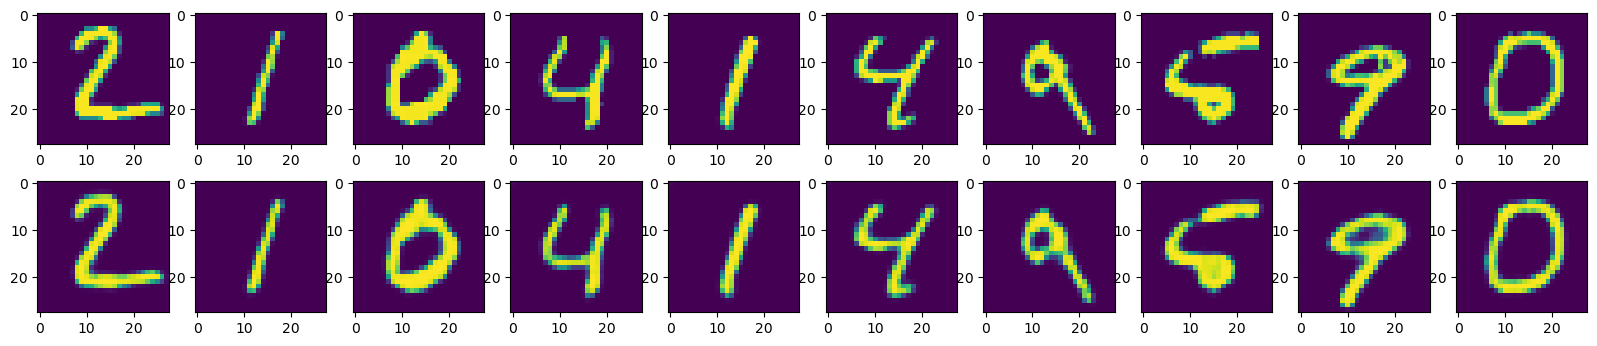

In [15]:
n = 10 #画两行10列的子图
plt.figure(figsize=(20,4))#宽20，高4
for i in range(1,11):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28,28))
    ax = plt.subplot(2, n, n+i)
    plt.imshow(pre_test[i].reshape(28,28))
    